<a href="https://colab.research.google.com/github/Malleshcr7/AI-ML-Projects/blob/main/Datasetcreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Comprehensive Data Cleaning Project: All Types with Massive Dataset
Project Overview
This notebook demonstrates all major data cleaning types using a large synthetic messy dataset (1000+ rows). Every cleaning technique is implemented step-by-step with text explanations and executable code cells for Google Colab.

##Data cleaning is critical for accurate analysis and machine learning. This project covers:

Missing data handling (deletion, imputation)

Structural error correction (typos, types, formatting)

Outlier management (detection, capping, transformation)

Standardization and normalization

Inaccuracy fixes (validation, logical checks)

Duplicate removal (exact and fuzzy)

Data transformation and enrichment (encoding, binning, feature engineering)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


##Creating a synthetic dataset with 1000 records containing all types of data quality issues

In [15]:
np.random.seed(42)
n_rows = 1000

# Generate base data with intentional messiness
data = {
    'CustomerID': list(range(1, n_rows + 1)),
    'Name': [],
    'Email': [],
    'Age': [],
    'Income': [],
    'City': [],
    'Country': [],
    'SignupDate': [],
    'LastPurchase': [],
    'ProductCategory': [],
    'SpendAmount': [],
    'AccountStatus': [],
    'PhoneNumber': []
}

# Names with inconsistent formatting
first_names = ['John', 'jane', 'ALICE', 'Bob ', ' Charlie', 'eve', 'David', 'Emma']
last_names = ['Smith', 'DOE', 'johnson', ' Brown', 'Davis ', 'WILSON', 'moore']

for i in range(n_rows):
    # Names with spacing and case issues
    data['Name'].append(f"{np.random.choice(first_names)} {np.random.choice(last_names)}")

    # Emails with inconsistencies
    if i % 10 == 0:
        data['Email'].append(None)  # Missing emails
    elif i % 15 == 0:
        data['Email'].append('invalid_email')  # Invalid format
    else:
        data['Email'].append(f"user{i}@{'GMAIL' if i % 2 else 'yahoo'}.com")

    # Age with outliers and missing values
    if i % 20 == 0:
        data['Age'].append(None)
    elif i % 30 == 0:
        data['Age'].append(np.random.choice([150, 200, -5, 0]))  # Outliers
    else:
        data['Age'].append(np.random.randint(18, 70))

    # Income with outliers and wrong types
    if i % 25 == 0:
        data['Income'].append(None)
    elif i % 35 == 0:
        data['Income'].append('fifty thousand')  # Text instead of number
    elif i % 40 == 0:
        data['Income'].append(-50000)  # Negative value
    else:
        data['Income'].append(np.random.randint(20000, 200000))

    # City with typos and inconsistent naming
    cities = ['New York', 'NY', 'new york', 'Los Angeles', 'LA', 'la',
              'Chicago', 'CHICAGO', 'Houston', 'houston']
    data['City'].append(np.random.choice(cities) if i % 15 != 0 else None)

    # Country with inconsistencies
    countries = ['USA', 'usa', 'United States', 'US', 'India', 'INDIA',
                 'UK', 'United Kingdom', 'Canada', 'CANADA']
    data['Country'].append(np.random.choice(countries))

    # Dates with format issues
    if i % 18 == 0:
        data['SignupDate'].append('not a date')
    elif i % 22 == 0:
        data['SignupDate'].append(None)
    else:
        date = datetime(2020, 1, 1) + timedelta(days=np.random.randint(0, 1500))
        formats = ['%Y-%m-%d', '%m/%d/%Y', '%d-%m-%Y']
        data['SignupDate'].append(date.strftime(np.random.choice(formats)))

    # Last purchase date (some after signup - logical error)
    if i % 20 == 0:
        data['LastPurchase'].append(None)
    else:
        date = datetime(2019, 1, 1) + timedelta(days=np.random.randint(0, 2000))
        data['LastPurchase'].append(date.strftime('%Y-%m-%d'))

    # Product categories with typos
    categories = ['Electronics', 'electronics', 'ELECTRONICS', 'Clothing',
                  'clothing', 'Books', 'books', 'Home & Garden', 'home']
    data['ProductCategory'].append(np.random.choice(categories) if i % 12 != 0 else None)

    # Spend amount with outliers
    if i % 28 == 0:
        data['SpendAmount'].append(None)
    elif i % 45 == 0:
        data['SpendAmount'].append(np.random.choice([1000000, -500]))
    else:
        data['SpendAmount'].append(round(np.random.uniform(10, 5000), 2))

    # Account status inconsistent
    statuses = ['Active', 'active', 'ACTIVE', 'Inactive', 'inactive',
                'Suspended', 'suspended', 'Y', 'N', 'Yes', 'No']
    data['AccountStatus'].append(np.random.choice(statuses) if i % 17 != 0 else None)

    # Phone numbers with format issues
    if i % 16 == 0:
        data['PhoneNumber'].append(None)
    elif i % 23 == 0:
        data['PhoneNumber'].append('123')  # Invalid
    else:
        formats = [f"+1-{np.random.randint(200,999)}-{np.random.randint(100,999)}-{np.random.randint(1000,9999)}",
                   f"{np.random.randint(2000000000,9999999999)}",
                   f"({np.random.randint(200,999)}) {np.random.randint(100,999)}-{np.random.randint(1000,9999)}"]
        data['PhoneNumber'].append(np.random.choice(formats))

# Add duplicates
for i in range(50):
    idx = np.random.randint(0, n_rows)
    for key in data.keys():
        if key != 'CustomerID':
            data[key].append(data[key][idx])
        else:
            data[key].append(data[key][idx])  # Duplicate ID

df_raw = pd.DataFrame(data)
print(f"Dataset shape: {df_raw.shape}")
df_raw.head(10)


Dataset shape: (1050, 13)


,CustomerID,Name,Email,Age,Income,City,Country,SignupDate,LastPurchase,ProductCategory,SpendAmount,AccountStatus,PhoneNumber
0,1,David Brown,None,NaN,None,None,United Kingdom,not a date,None,None,NaN,None,None
1,2,Charlie Davis,user1@GMAIL.com,56.0,157337,new york,UK,26-11-2020,2019-03-29,clothing,3009.56,Y,+1-330-761-1769
2,3,John Brown,user2@yahoo.com,39.0,150608,houston,United States,2023-06-21,2022-02-28,clothing,3041.65,inactive,+1-366-373-9792
3,4,jane Brown,user3@GMAIL.com,45.0,140174,Chicago,United Kingdom,02/04/2020,2022-01-09,Clothing,919.36,Inactive,6429456860
4,5,jane WILSON,user4@yahoo.com,53.0,183678,CHICAGO,UK,2023-06-29,2023-09-22,Home & Garden,4224.22,active,(692) 140-6276
5,6,Charlie Smith,user5@GMAIL.com,42.0,60774,Houston,United Kingdom,26-02-2023,2022-03-08,ELECTRONICS,3537.22,ACTIVE,+1-618-388-6892
6,7,Emma Brown,user6@yahoo.com,51.0,72256,Chicago,UK,15-03-2022,2020-11-14,Home & Garden,1380.86,ACTIVE,(968) 104-8385
7,8,David WILSON,user7@GMAIL.com,56.0,141626,Houston,CANADA,2022-06-10,2023-09-11,books,2382.10,Inactive,+1-933-584-8574
8,9,Emma moore,user8@yahoo.com,68.0,137845,NY,CANADA,07/10/2021,2024-05-30,clothing,4358.59,Inactive,+1-997-430-2663
9,10,John johnson,user9@GMAIL.com,69.0,147948,Houston,United States,10/14/2023,2023-01-19,home,2429.30,Active,+1-433-783-1663


##Examine the raw dataset to understand its structure, data types, and initial quality issues.



In [16]:
print("Dataset Info:")
print(df_raw.info())
print("\n" + "="*50 + "\n")
print("First 10 rows:")
print(df_raw.head(10))
print("\n" + "="*50 + "\n")
print("Missing values per column:")
print(df_raw.isnull().sum())
print("\n" + "="*50 + "\n")
print("Basic statistics:")
print(df_raw.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1050 non-null   int64  
 1   Name             1050 non-null   object 
 2   Email            941 non-null    object 
 3   Age              995 non-null    float64
 4   Income           1007 non-null   object 
 5   City             980 non-null    object 
 6   Country          1050 non-null   object 
 7   SignupDate       1007 non-null   object 
 8   LastPurchase     995 non-null    object 
 9   ProductCategory  964 non-null    object 
 10  SpendAmount      1011 non-null   float64
 11  AccountStatus    990 non-null    object 
 12  PhoneNumber      985 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 106.8+ KB
None


First 10 rows:
   CustomerID             Name            Email   Age  Income      City  \
0           1     David  Br

##Visualize Missing Data
Create a heatmap to visualize the pattern of missing values across the dataset.

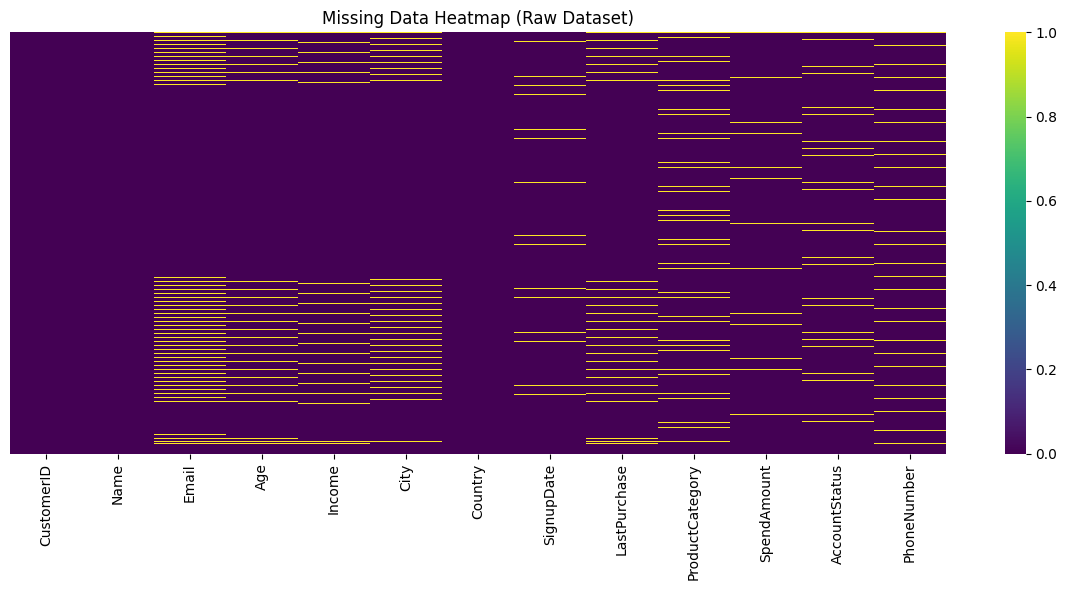

Missing data percentage by column:
Email              10.380952
ProductCategory     8.190476
City                6.666667
PhoneNumber         6.190476
AccountStatus       5.714286
Age                 5.238095
LastPurchase        5.238095
Income              4.095238
SignupDate          4.095238
SpendAmount         3.714286
dtype: float64


In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_raw.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap (Raw Dataset)')
plt.tight_layout()
plt.show()

# Missing data percentage
missing_pct = (df_raw.isnull().sum() / len(df_raw)) * 100
print("Missing data percentage by column:")
print(missing_pct[missing_pct > 0].sort_values(ascending=False))


  ## HANDLING MISSING DATA

  ## Missing Data Strategy
We'll use multiple approaches:

Deletion for rows with critical missing values

Statistical imputation (mean, median, mode)

Forward/backward fill for time series

Constant value imputation

In [18]:
df = df_raw.copy()
print(f"Starting with {len(df)} rows")


Starting with 1050 rows


Listwise Deletion for Critical Missing

In [19]:
# Remove rows where CustomerID is missing (critical field)
initial_count = len(df)
df = df[df['CustomerID'].notna()]
print(f"Removed {initial_count - len(df)} rows with missing CustomerID")


Removed 0 rows with missing CustomerID


Column Deletion Assessment

In [20]:
# Check if any column has > 50% missing (would consider deletion)
high_missing = (df.isnull().sum() / len(df)) > 0.5
print("Columns with >50% missing data:")
print(high_missing[high_missing == True])



Columns with >50% missing data:
Series([], dtype: bool)


Statistical Imputation - Numerical Columns

In [21]:
# Age: Impute with median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
print(f"Filled Age missing values with median: {age_median}")

# Income: Impute with mean (after cleaning)
# Will handle this after fixing data types

# SpendAmount: Impute with median
spend_median = df['SpendAmount'].median()
df['SpendAmount'].fillna(spend_median, inplace=True)
print(f"Filled SpendAmount missing values with median: {spend_median}")


Filled Age missing values with median: 43.0
Filled SpendAmount missing values with median: 2441.19


 Mode Imputation - Categorical Columns


In [22]:
# City: Impute with mode
city_mode = df['City'].mode()[0] if len(df['City'].mode()) > 0 else 'Unknown'
df['City'].fillna(city_mode, inplace=True)

# ProductCategory: Impute with mode
category_mode = df['ProductCategory'].mode()[0] if len(df['ProductCategory'].mode()) > 0 else 'Unknown'
df['ProductCategory'].fillna(category_mode, inplace=True)

# AccountStatus: Impute with mode
status_mode = df['AccountStatus'].mode()[0] if len(df['AccountStatus'].mode()) > 0 else 'Unknown'
df['AccountStatus'].fillna(status_mode, inplace=True)

print("Filled categorical columns with mode values")


Filled categorical columns with mode values


Constant Value Imputation

In [23]:
# Email: Fill with placeholder
df['Email'].fillna('unknown@email.com', inplace=True)

# PhoneNumber: Fill with placeholder
df['PhoneNumber'].fillna('000-000-0000', inplace=True)

print("Filled Email and PhoneNumber with constant placeholders")


Filled Email and PhoneNumber with constant placeholders


Check Remaining Missing Values


In [24]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
CustomerID          0
Name                0
Email               0
Age                 0
Income             43
City                0
Country             0
SignupDate         43
LastPurchase       55
ProductCategory     0
SpendAmount         0
AccountStatus       0
PhoneNumber         0
dtype: int64


##CORRECTING STRUCTURAL ERRORS
##Fix Typos and Inconsistent Capitalization
Standardize text fields to ensure consistency across the dataset.

In [25]:
# Strip whitespace and title case
df['Name'] = df['Name'].str.strip().str.title()
print("Sample cleaned names:")
print(df['Name'].head(10))


Sample cleaned names:
0     David  Brown
1    Charlie Davis
2      John  Brown
3      Jane  Brown
4      Jane Wilson
5    Charlie Smith
6      Emma  Brown
7     David Wilson
8       Emma Moore
9     John Johnson
Name: Name, dtype: object


Standardize City Names

In [26]:
# Create mapping for city standardization
city_mapping = {
    'new york': 'New York',
    'ny': 'New York',
    'los angeles': 'Los Angeles',
    'la': 'Los Angeles',
    'chicago': 'Chicago',
    'houston': 'Houston'
}

df['City'] = df['City'].str.strip().str.lower()
df['City'] = df['City'].replace(city_mapping)
df['City'] = df['City'].str.title()

print("Unique cities after standardization:")
print(df['City'].unique())


Unique cities after standardization:
['Chicago' 'New York' 'Houston' 'Los Angeles']


Standardize Country Names

In [27]:
# Create mapping for country standardization
country_mapping = {
    'usa': 'USA',
    'united states': 'USA',
    'us': 'USA',
    'india': 'India',
    'uk': 'UK',
    'united kingdom': 'UK',
    'canada': 'Canada'
}

df['Country'] = df['Country'].str.strip().str.lower()
df['Country'] = df['Country'].replace(country_mapping)

print("Unique countries after standardization:")
print(df['Country'].unique())


Unique countries after standardization:
['UK' 'USA' 'Canada' 'India']


 Standardize Product Categories

In [28]:
df['ProductCategory'] = df['ProductCategory'].str.strip().str.lower()
category_mapping = {
    'electronics': 'Electronics',
    'clothing': 'Clothing',
    'books': 'Books',
    'home': 'Home & Garden',
    'home & garden': 'Home & Garden'
}

df['ProductCategory'] = df['ProductCategory'].replace(category_mapping)

print("Unique product categories after standardization:")
print(df['ProductCategory'].unique())


Unique product categories after standardization:
['Clothing' 'Home & Garden' 'Electronics' 'Books']


 Standardize Account Status

In [29]:
def normalize_status(val):
    if pd.isna(val):
        return 'Unknown'
    val = str(val).strip().lower()
    if val in ['active', 'y', 'yes']:
        return 'Active'
    elif val in ['inactive', 'n', 'no']:
        return 'Inactive'
    elif val in ['suspended']:
        return 'Suspended'
    else:
        return 'Unknown'

df['AccountStatus'] = df['AccountStatus'].apply(normalize_status)

print("Unique account statuses after standardization:")
print(df['AccountStatus'].unique())


Unique account statuses after standardization:
['Active' 'Inactive' 'Suspended']


##Fix Wrong Data Types
Ensure all columns have appropriate data types for analysis.

In [30]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].median(), inplace=True)
print(f"Age data type: {df['Age'].dtype}")


Age data type: float64


Convert Income to Numeric

In [31]:
def clean_income(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, str):
        val = val.lower().replace('fifty thousand', '50000')
        val = val.replace(',', '').replace('$', '')
    try:
        return float(val)
    except:
        return np.nan

df['Income'] = df['Income'].apply(clean_income)
df['Income'].fillna(df['Income'].median(), inplace=True)
print(f"Income data type: {df['Income'].dtype}")
print(f"Income range: {df['Income'].min()} to {df['Income'].max()}")


Income data type: float64
Income range: -50000.0 to 199961.0


Parse Date Columns

In [32]:
# SignupDate - multiple formats
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce', infer_datetime_format=True)

# LastPurchase
df['LastPurchase'] = pd.to_datetime(df['LastPurchase'], errors='coerce')

# Fill missing dates with median date
signup_median = df['SignupDate'].median()
df['SignupDate'].fillna(signup_median, inplace=True)

purchase_median = df['LastPurchase'].median()
df['LastPurchase'].fillna(purchase_median, inplace=True)

print("Date columns converted to datetime:")
print(f"SignupDate range: {df['SignupDate'].min()} to {df['SignupDate'].max()}")
print(f"LastPurchase range: {df['LastPurchase'].min()} to {df['LastPurchase'].max()}")


Date columns converted to datetime:
SignupDate range: 2020-01-01 00:00:00 to 2024-06-01 00:00:00
LastPurchase range: 2019-01-06 00:00:00 to 2024-06-22 00:00:00


Standardize Email Format

In [33]:
df['Email'] = df['Email'].str.strip().str.lower()
print("Sample emails after standardization:")
print(df['Email'].head(10))


Sample emails after standardization:
0    unknown@email.com
1      user1@gmail.com
2      user2@yahoo.com
3      user3@gmail.com
4      user4@yahoo.com
5      user5@gmail.com
6      user6@yahoo.com
7      user7@gmail.com
8      user8@yahoo.com
9      user9@gmail.com
Name: Email, dtype: object


##MANAGING OUTLIERS
##Outlier Detection and Treatment
Identify outliers using statistical methods (Z-score, IQR) and apply appropriate treatments.

Detect Outliers - Age

Found 12 age outliers using Z-score method
Sample age outliers:
              Name    Age
90     John Wilson  200.0
150     Bob  Smith  150.0
210     Eve Wilson  200.0
270    John  Brown  200.0
390  Charlie Moore  200.0


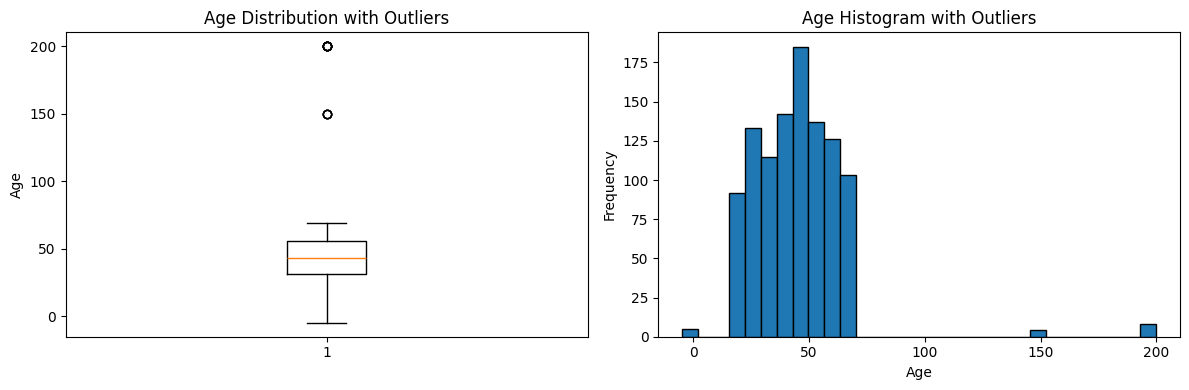

In [34]:
# Z-score method
z_scores = np.abs(stats.zscore(df['Age']))
age_outliers = df[z_scores > 3]

print(f"Found {len(age_outliers)} age outliers using Z-score method")
print("Sample age outliers:")
print(age_outliers[['Name', 'Age']].head())

# Visualize before treatment
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Age Distribution with Outliers')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Histogram with Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Cap Age Outliers (Winsorizing)

Age after capping: 18.0 to 80.0


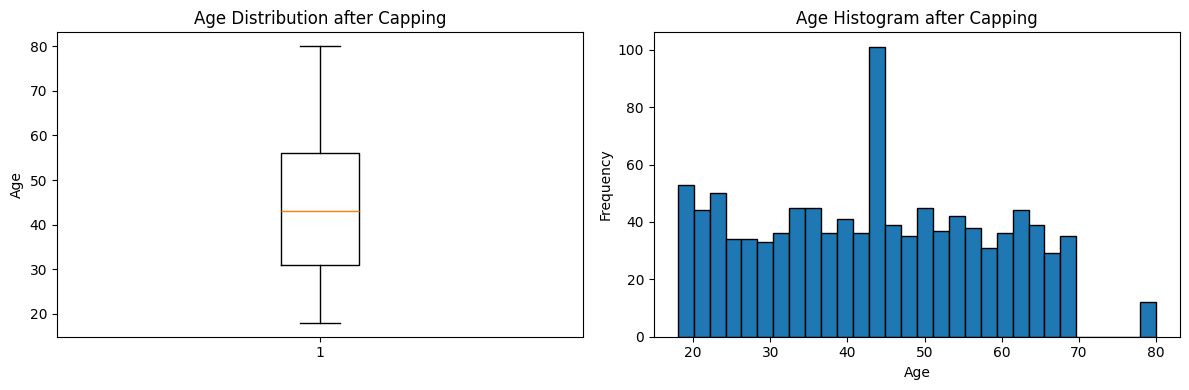

In [35]:
# Cap age between 18 and 80
df['Age'] = df['Age'].clip(lower=18, upper=80)

print(f"Age after capping: {df['Age'].min()} to {df['Age'].max()}")

# Visualize after treatment
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Age Distribution after Capping')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Histogram after Capping')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Detect Outliers - Income (IQR Method)

Found 0 income outliers using IQR method
IQR bounds: -78070.625 to 289048.375


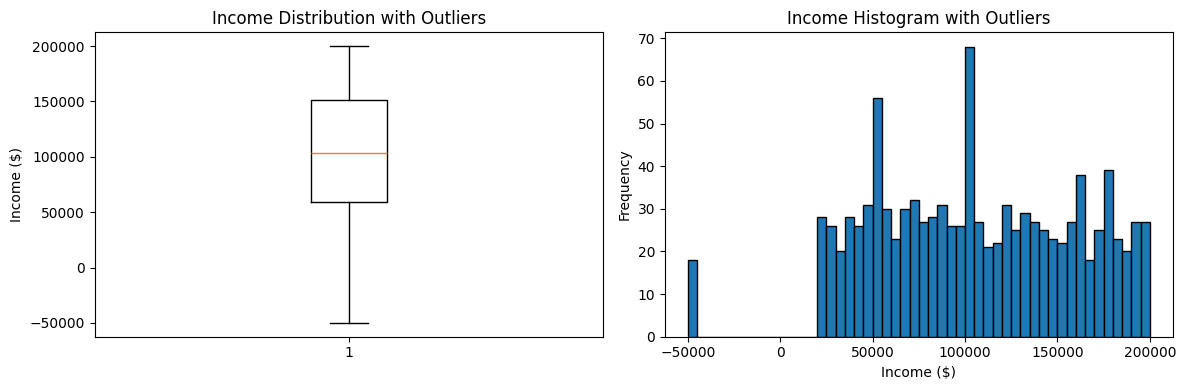

In [36]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

income_outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Found {len(income_outliers)} income outliers using IQR method")
print(f"IQR bounds: {lower_bound} to {upper_bound}")

# Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Income'])
plt.title('Income Distribution with Outliers')
plt.ylabel('Income ($)')

plt.subplot(1, 2, 2)
plt.hist(df['Income'], bins=50, edgecolor='black')
plt.title('Income Histogram with Outliers')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Cap Income Outliers

Income after capping: $15,000 to $199,961


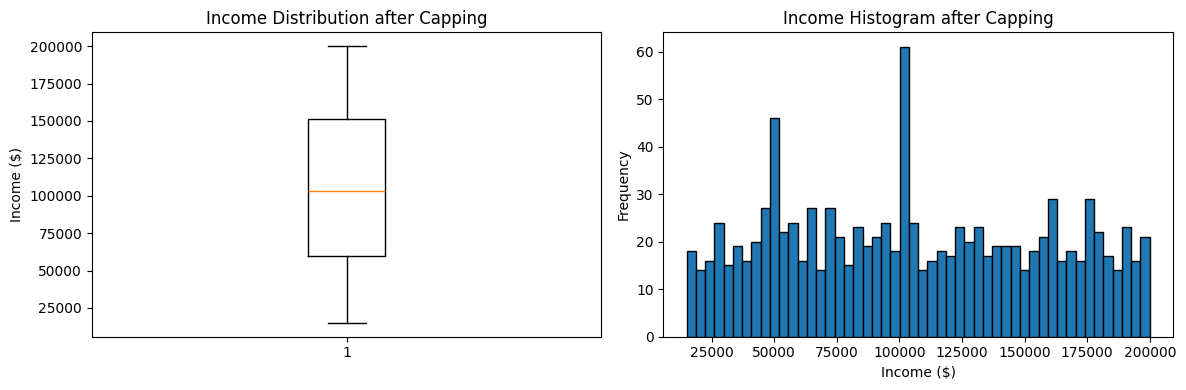

In [37]:
# Remove negative income and cap at reasonable bounds
df['Income'] = df['Income'].clip(lower=15000, upper=250000)

print(f"Income after capping: ${df['Income'].min():,.0f} to ${df['Income'].max():,.0f}")

# Visualize after treatment
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df['Income'])
plt.title('Income Distribution after Capping')
plt.ylabel('Income ($)')

plt.subplot(1, 2, 2)
plt.hist(df['Income'], bins=50, edgecolor='black')
plt.title('Income Histogram after Capping')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Transform SpendAmount (Log Transformation)

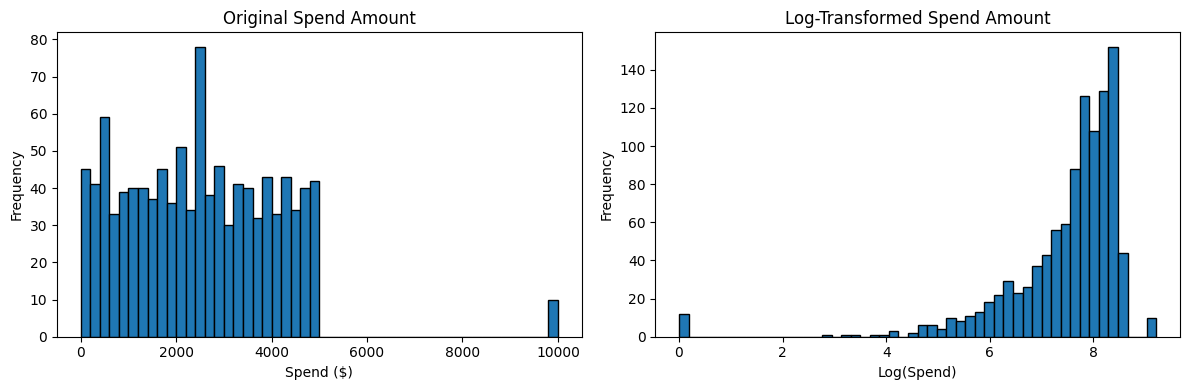

In [38]:
# Remove negative and zero values first
df['SpendAmount'] = df['SpendAmount'].clip(lower=1, upper=10000)

# Create log-transformed version for analysis
df['SpendAmount_Log'] = np.log(df['SpendAmount'])

# Visualize transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['SpendAmount'], bins=50, edgecolor='black')
plt.title('Original Spend Amount')
plt.xlabel('Spend ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['SpendAmount_Log'], bins=50, edgecolor='black')
plt.title('Log-Transformed Spend Amount')
plt.xlabel('Log(Spend)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##STANDARDIZING AND NORMALIZING DATA
##Data Standardization and Normalization
Apply scaling techniques and standardize formats across the dataset.

Min-Max Normalization (0-1 Scale)

Normalized columns created:
    Age  Age_Normalized    Income  Income_Normalized
0  43.0        0.403226  103308.0           0.477441
1  56.0        0.612903  157337.0           0.769551
2  39.0        0.338710  150608.0           0.733171
3  45.0        0.435484  140174.0           0.676759
4  53.0        0.564516  183678.0           0.911965


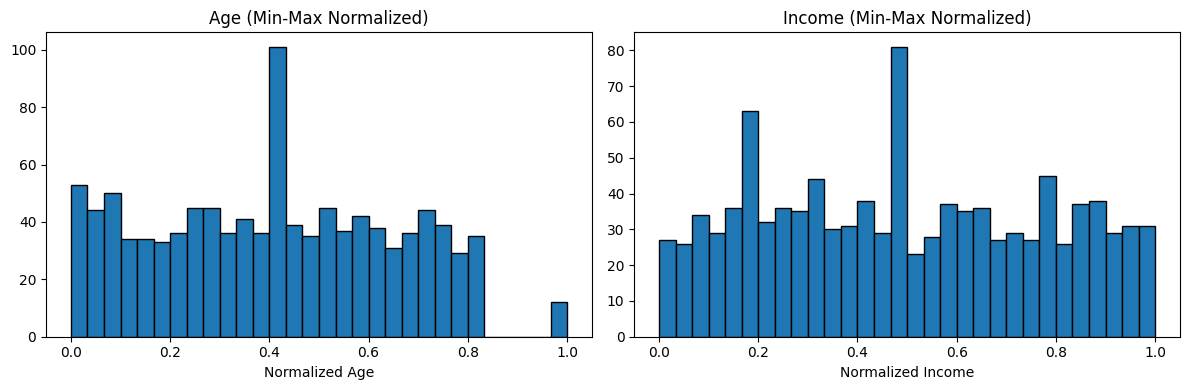

In [39]:
# Normalize Age and Income to 0-1 scale
scaler_minmax = MinMaxScaler()

df['Age_Normalized'] = scaler_minmax.fit_transform(df[['Age']])
df['Income_Normalized'] = scaler_minmax.fit_transform(df[['Income']])

print("Normalized columns created:")
print(df[['Age', 'Age_Normalized', 'Income', 'Income_Normalized']].head())

# Visualize
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Age_Normalized'], bins=30, edgecolor='black')
plt.title('Age (Min-Max Normalized)')
plt.xlabel('Normalized Age')

plt.subplot(1, 2, 2)
plt.hist(df['Income_Normalized'], bins=30, edgecolor='black')
plt.title('Income (Min-Max Normalized)')
plt.xlabel('Normalized Income')
plt.tight_layout()
plt.show()


Z-Score Standardization

Standardized spend amount statistics:
Mean: -0.0000
Std: 1.0005


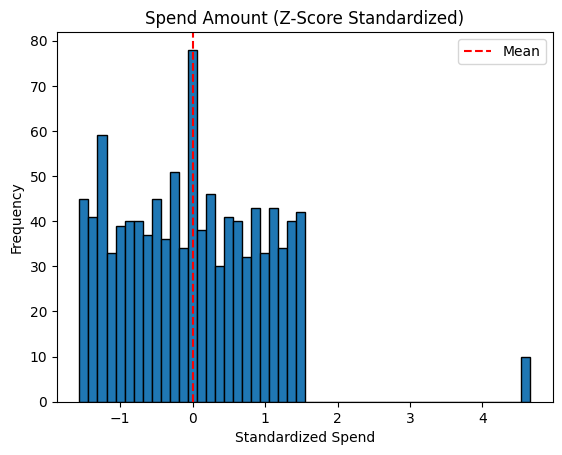

In [40]:
# Standardize SpendAmount using Z-score
scaler_standard = StandardScaler()

df['SpendAmount_Standardized'] = scaler_standard.fit_transform(df[['SpendAmount']])

print("Standardized spend amount statistics:")
print(f"Mean: {df['SpendAmount_Standardized'].mean():.4f}")
print(f"Std: {df['SpendAmount_Standardized'].std():.4f}")

# Visualize
plt.hist(df['SpendAmount_Standardized'], bins=50, edgecolor='black')
plt.title('Spend Amount (Z-Score Standardized)')
plt.xlabel('Standardized Spend')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()
